# Authored by : Amirul Uzair

# Load Dependencies

In [42]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from pandas import read_csv
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

print("All dependencies imported successfully")

All dependencies imported successfully


In [43]:
df = pd.read_csv(r"C:\Users\amiru\Desktop\Data Scientist Final Project\Dataset Acquisitions\updated_pollution_dataset.csv")
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


# Exploring Data 

## Data Shape and Info

In [44]:
df.shape

(5000, 10)

In [45]:
df.info

<bound method DataFrame.info of       Temperature  Humidity  PM2.5   PM10   NO2   SO2    CO  \
0            29.8      59.1    5.2   17.9  18.9   9.2  1.72   
1            28.3      75.6    2.3   12.2  30.8   9.7  1.64   
2            23.1      74.7   26.7   33.8  24.4  12.6  1.63   
3            27.1      39.1    6.1    6.3  13.5   5.3  1.15   
4            26.5      70.7    6.9   16.0  21.9   5.6  1.01   
...           ...       ...    ...    ...   ...   ...   ...   
4995         40.6      74.1  116.0  126.7  45.5  25.7  2.11   
4996         28.1      96.9    6.9   25.0  25.3  10.8  1.54   
4997         25.9      78.2   14.2   22.1  34.8   7.8  1.63   
4998         25.3      44.4   21.4   29.0  23.7   5.7  0.89   
4999         24.1      77.9   81.7   94.3  23.2  10.5  1.38   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                               6.3                 319    Moderate  
1                               6.0                 611    Moderate  
2

## Data Types

In [46]:
df.dtypes

Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
Air Quality                       object
dtype: object

## Glimpse of Dataset

In [47]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [48]:
df.tail()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good
4999,24.1,77.9,81.7,94.3,23.2,10.5,1.38,8.3,461,Moderate


## Unique Features

In [49]:
for col in df.columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'Temperature': [29.8 28.3 23.1 27.1 26.5 39.4 41.7 31.  29.4 33.2 26.3 32.5 20.  28.6
 22.3 32.  22.9 37.6 34.7 37.8 27.6 25.6 24.6 26.2 22.6 30.  29.6 52.5
 44.7 23.3 35.4 29.7 21.8 27.7 27.5 28.  22.2 33.3 37.5 30.9 39.3 24.7
 27.8 17.4 18.1 22.4 25.3 42.1 32.6 46.1 33.5 48.1 31.6 29.  24.9 20.8
 28.2 21.5 17.5 58.6 28.1 25.  25.7 35.1 26.7 20.4 25.9 22.1 34.1 30.4
 41.4 25.5 36.6 18.8 34.9 23.  21.4 32.3 33.1 29.9 29.3 23.9 23.7 21.9
 44.9 27.  49.6 33.4 23.5 41.5 21.  31.3 46.8 24.1 22.5 29.5 33.  30.1
 27.4 30.8 36.2 32.8 21.6 31.4 24.2 47.3 40.  29.2 20.1 42.6 33.7 30.7
 37.3 28.9 25.2 30.2 35.6 32.4 35.  15.4 22.8 34.4 23.2 30.5 24.  32.1
 14.1 28.8 31.1 38.1 33.6 24.5 28.7 38.3 25.1 32.9 26.1 43.1 29.1 28.4
 34.5 23.4 36.4 26.4 38.7 50.9 26.  47.2 35.8 31.7 39.1 27.2 39.6 40.2
 47.4 25.8 54.6 35.9 31.2 42.7 36.  36.5 53.1 20.3 24.3 22.7 23.8 32.7
 20.5 25.4 40.6 28.5 30.3 34.  38.8 26.6 35.5 37.1 42.2 21.7 19.4 50.3
 36.7 37.  19.6 44.  43.3 27.3 44.8 35

# Data Cleaning

## Checking for Missing Values

In [50]:
df.isnull()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False


In [51]:
# Extract rows and columns where data is missing
missing_values = df[df.isnull().any(axis=1)][df.columns[df.isnull().any(axis=0)]]
print("\nRows and columns with missing values:")
print(missing_values)


Rows and columns with missing values:
Empty DataFrame
Columns: []
Index: []


## Checking for Duplicated Values

In [52]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
print()
if duplicate_rows.shape[0] > 0:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0

No duplicate rows found.


## Assign Value to Class Label

In [53]:
# Define the ranking/order of the class categories (worst to best)
ordered_classes = ['Good', 'Moderate', 'Poor', 'Hazardous']

# Convert 'Air Quality' column to a categorical type with the specified order
df['Air Quality'] = pd.Categorical(df['Air Quality'], categories=ordered_classes, ordered=True)

# Define the mapping from class categories to numeric values
class_mapping = {'Hazardous': 0, 'Poor': 1, 'Moderate': 2, 'Good': 3}

# Apply the mapping to the 'Air Quality' column and store it as a new column
df['Air Quality_encoded'] = df['Air Quality'].map(class_mapping)

# Use pop() to remove the original 'Air Quality' column
air_quality_encoded = df.pop('Air Quality_encoded')

# Add the encoded column back to the DataFrame with the desired name
df['Air Quality'] = air_quality_encoded.astype(int)

# Display the result
print(df)
df

      Temperature  Humidity  PM2.5   PM10   NO2   SO2    CO  \
0            29.8      59.1    5.2   17.9  18.9   9.2  1.72   
1            28.3      75.6    2.3   12.2  30.8   9.7  1.64   
2            23.1      74.7   26.7   33.8  24.4  12.6  1.63   
3            27.1      39.1    6.1    6.3  13.5   5.3  1.15   
4            26.5      70.7    6.9   16.0  21.9   5.6  1.01   
...           ...       ...    ...    ...   ...   ...   ...   
4995         40.6      74.1  116.0  126.7  45.5  25.7  2.11   
4996         28.1      96.9    6.9   25.0  25.3  10.8  1.54   
4997         25.9      78.2   14.2   22.1  34.8   7.8  1.63   
4998         25.3      44.4   21.4   29.0  23.7   5.7  0.89   
4999         24.1      77.9   81.7   94.3  23.2  10.5  1.38   

      Proximity_to_Industrial_Areas  Population_Density  Air Quality  
0                               6.3                 319            2  
1                               6.0                 611            2  
2                             

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,3
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,3
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,0
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,2
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,2
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,3


In [54]:
df.dtypes

Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
Air Quality                        int32
dtype: object

# Descriptive Statistical Analysis


In [55]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800,2.0000
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084,1.0001
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000,0.0000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000,1.0000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000,2.0000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000,3.0000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000,3.0000


## Measuring Central Tendency

In [56]:
# Select column
columns_to_analyze = df.columns[0:9]

# Calculate mean, median, and mode for each column
mean_values = df[columns_to_analyze].mean()
median_values = df[columns_to_analyze].median()
mode_values = df[columns_to_analyze].mode().iloc[0]

# Display the results
print("Mean values for features:")
print(mean_values)
print("\nMedian values for features:")
print(median_values)
print("\nMode values for features:")
print(mode_values)

Mean values for features:
Temperature                       30.029020
Humidity                          70.056120
PM2.5                             20.142140
PM10                              30.218360
NO2                               26.412100
SO2                               10.014820
CO                                 1.500354
Proximity_to_Industrial_Areas      8.425400
Population_Density               497.423800
dtype: float64

Median values for features:
Temperature                       29.00
Humidity                          69.80
PM2.5                             12.00
PM10                              21.70
NO2                               25.30
SO2                                8.00
CO                                 1.41
Proximity_to_Industrial_Areas      7.90
Population_Density               494.00
dtype: float64

Mode values for features:
Temperature                       26.80
Humidity                          73.00
PM2.5                              1.50
PM10        

## Measures of Variability

In [57]:
# Select column
columns_to_analyze = df.columns[0:9]

# Calculate standard deviation, variance, and range for each numerical column
std_values = df[columns_to_analyze].std()
variance_values = df[columns_to_analyze].var()
range_values = df[columns_to_analyze].max() - df[columns_to_analyze].min()

# Display the results
print("Standard Deviation values for numerical features:")
print(std_values)
print("\nVariance values for numerical features:")
print(variance_values)
print("\nRange values for numerical features:")
print(range_values)

Standard Deviation values for numerical features:
Temperature                        6.720661
Humidity                          15.863577
PM2.5                             24.554546
PM10                              27.349199
NO2                                8.895356
SO2                                6.750303
CO                                 0.546027
Proximity_to_Industrial_Areas      3.610944
Population_Density               152.754084
dtype: float64

Variance values for numerical features:
Temperature                         45.167289
Humidity                           251.653065
PM2.5                              602.925723
PM10                               747.978707
NO2                                 79.127365
SO2                                 45.566596
CO                                   0.298145
Proximity_to_Industrial_Areas       13.038915
Population_Density               23333.810156
dtype: float64

Range values for numerical features:
Temperature                    

# Distribution of Features

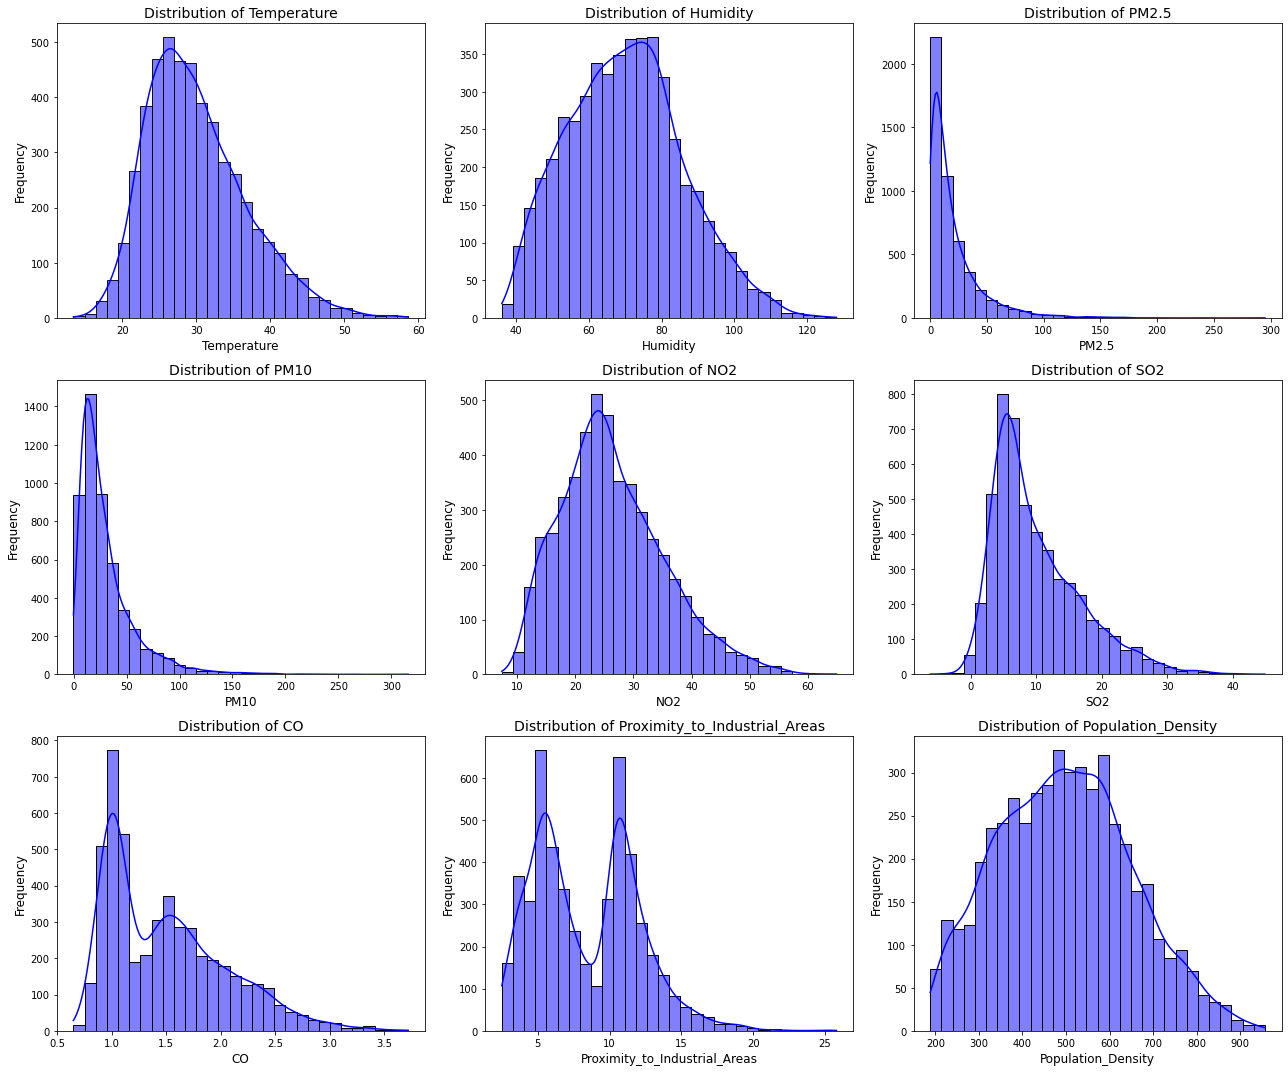

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

df_features = df.drop(columns=[df.columns[9]])

# Visualize the distribution of all features except the target
def plot_distributions(df, cols_per_row=3):
    num_cols = len(df.columns)
    num_rows = (num_cols // cols_per_row) + int(num_cols % cols_per_row > 0)

    plt.figure(figsize=(cols_per_row * 6, num_rows * 5))
    for i, column in enumerate(df.columns, 1):
        plt.subplot(num_rows, cols_per_row, i)
        sns.histplot(df[column], kde=True, bins=30, color='blue', edgecolor='black')
        plt.title(f"Distribution of {column}", fontsize=14)  # Increased title font size
        plt.xlabel(column, fontsize=12)  # Increased x-label font size
        plt.ylabel("Frequency", fontsize=12)  # Increased y-label font size
        plt.tight_layout()
    plt.show()

# Call the function to plot distributions
plot_distributions(df_features, cols_per_row=3)

## Measurement of Skewness

In [61]:
# Summary statistics for all numeric columns
print("Summary Statistics for Numeric Columns:")
print(df.describe())

# Check skewness for all numeric columns
from scipy.stats import skew

print("\nSkewness for All Numeric Columns:")
skewness = df.select_dtypes(include=['number']).apply(skew)
print(skewness)

Summary Statistics for Numeric Columns:
       Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    30.218360    26.412100   
std       6.720661    15.863577    24.554546    27.349199     8.895356   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.100000    38.100000    31.900000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.6500

## Checking for Outliers

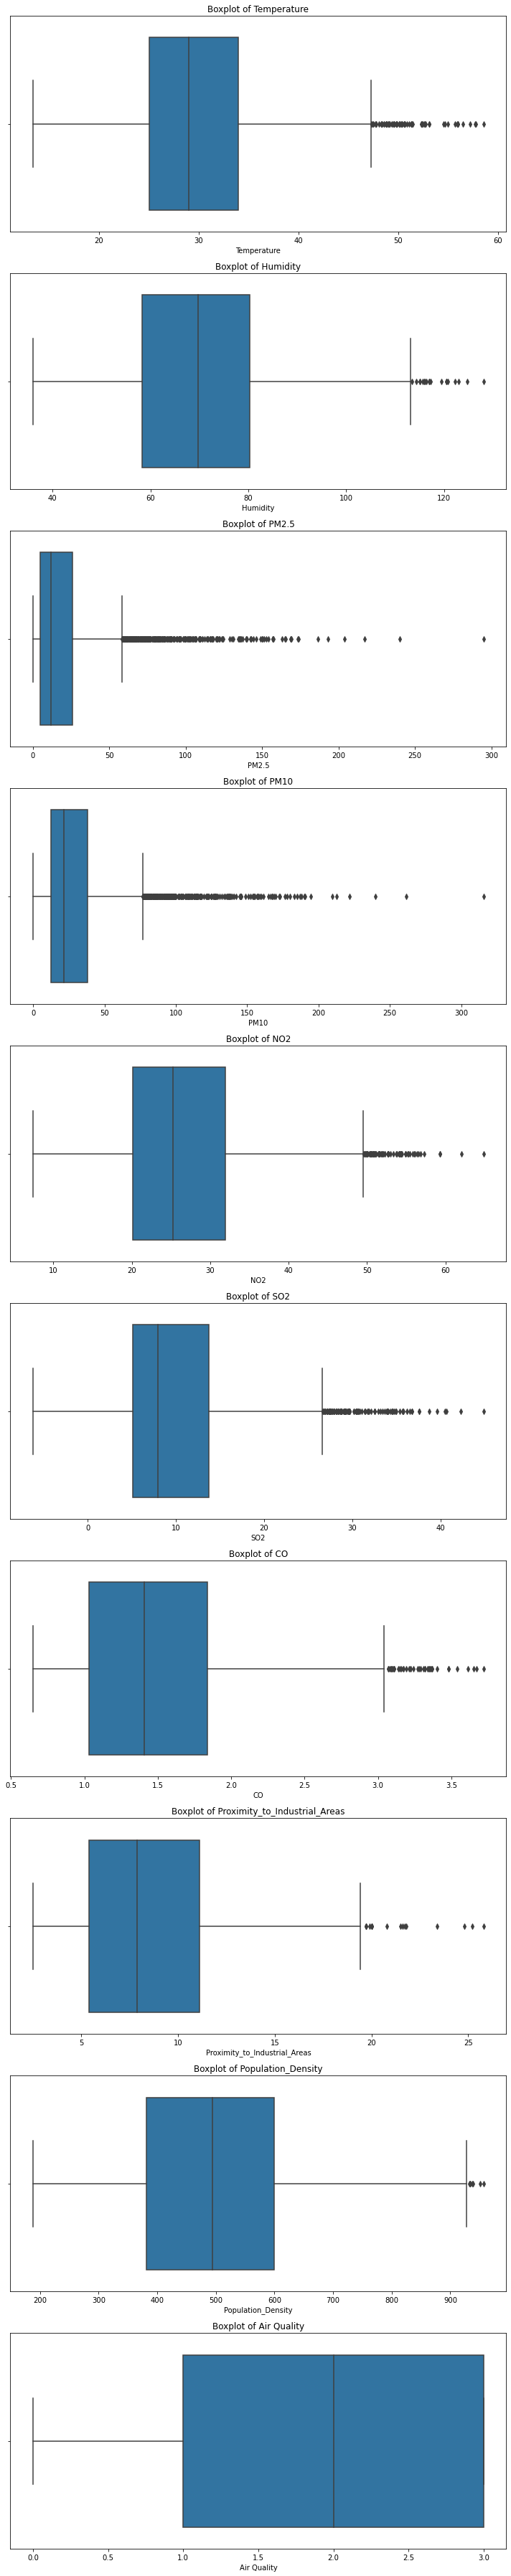

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Generate boxplots for all numeric columns
plt.figure(figsize=(10, len(numeric_columns) * 5))  
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

## Density Plot

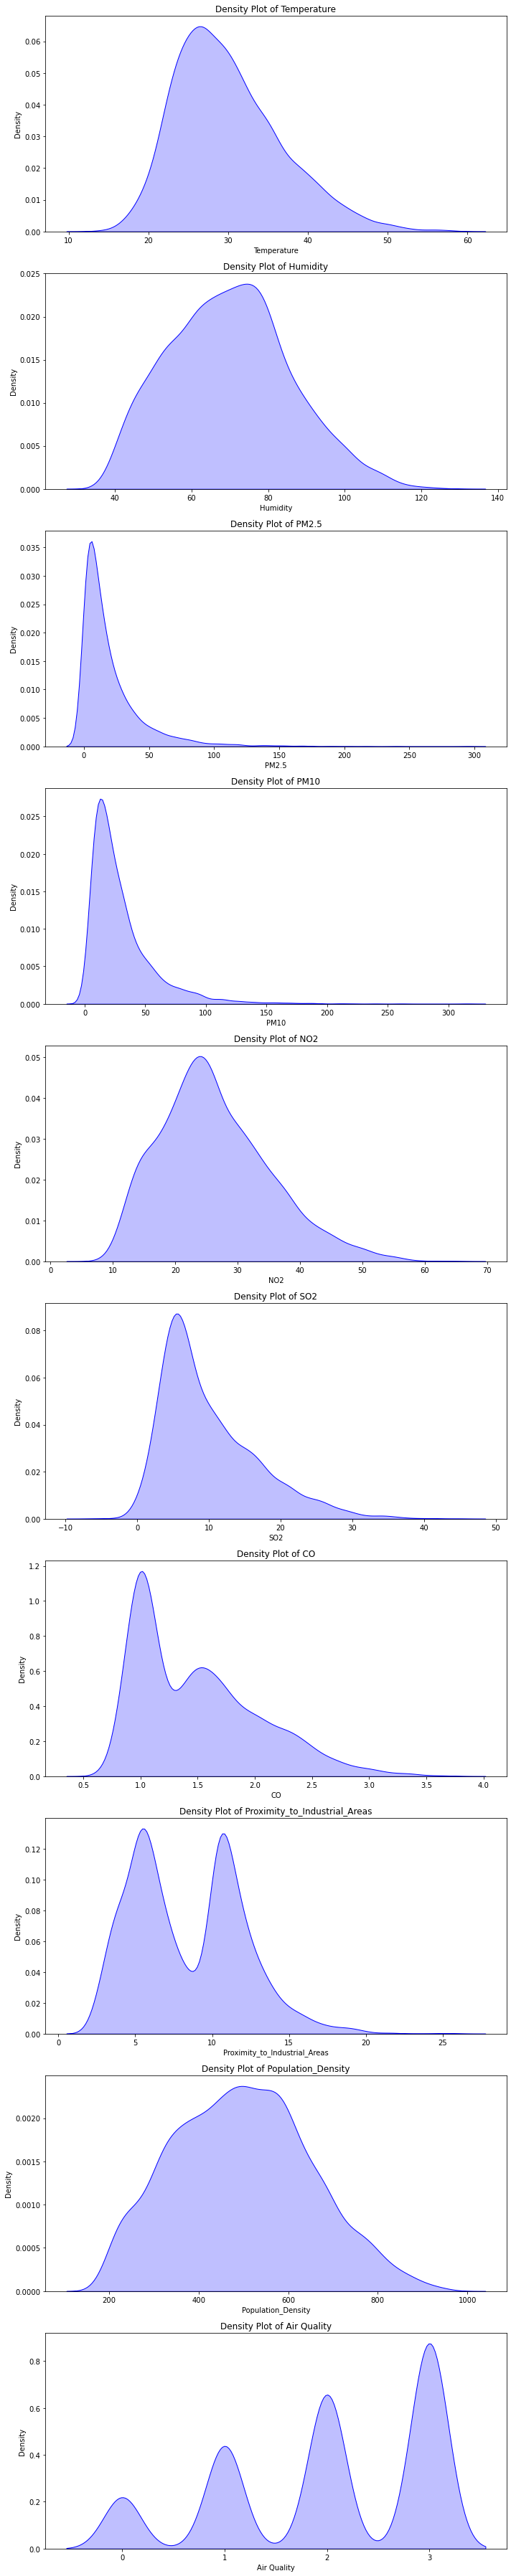

In [67]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Generate density plots for all numeric columns
plt.figure(figsize=(10, len(numeric_columns) * 5))  # Adjust figure size based on the number of columns
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.kdeplot(df[column], shade=True, color='blue')
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

## Handling Outliers

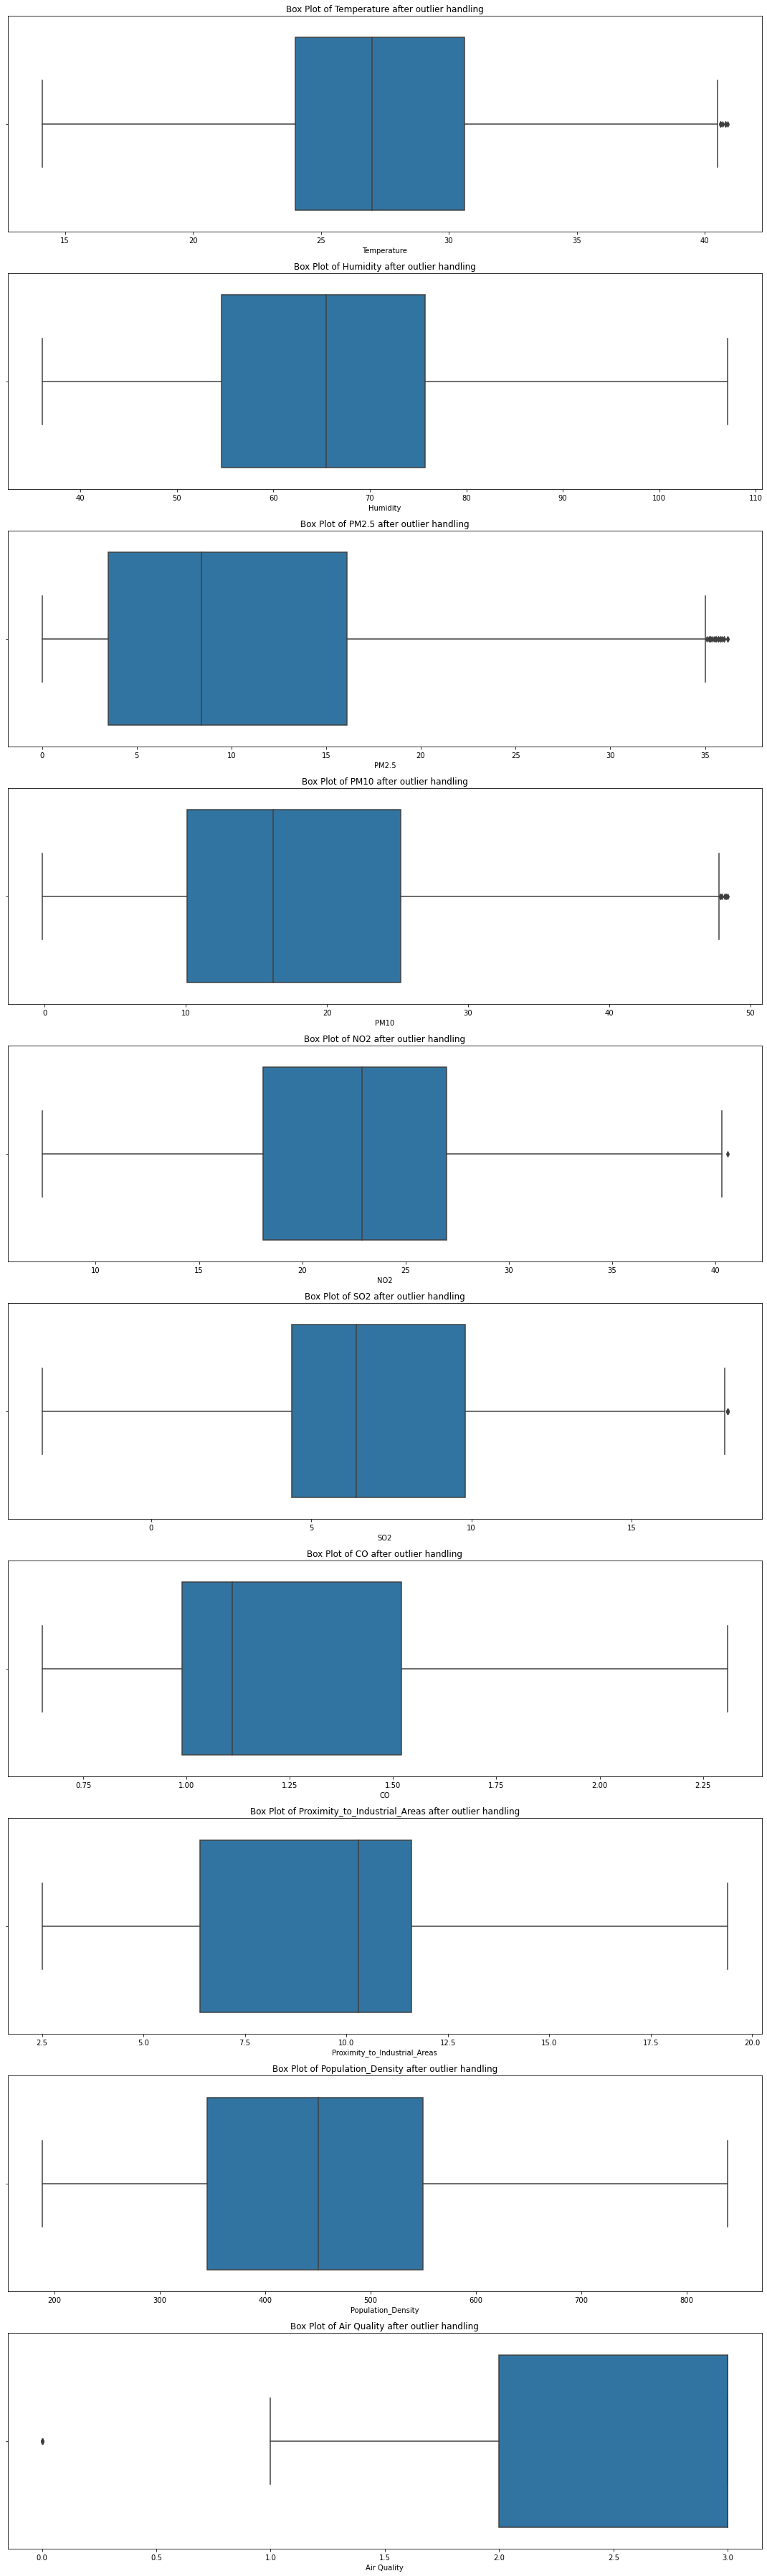

In [80]:
# Define a function to handle outliers using the IQR method
def handle_outliers_iqr(data, column, factor=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Apply the function to all numeric columns except "Air Quality"
for column in df.select_dtypes(include=['number']).columns:
    if column != 'Air Quality':  # Skip the "Air Quality" column
        df = handle_outliers_iqr(df, column=column)

# Reset the index after removing outliers
df = df.reset_index(drop=True)

# Verify the changes for all numeric columns
plt.figure(figsize=(15, len(df.select_dtypes(include=['number']).columns) * 5))
for i, column in enumerate(df.select_dtypes(include=['number']).columns, 1):
    plt.subplot(len(df.select_dtypes(include=['number']).columns), 1, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column} after outlier handling')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

## Boxplot for Cleaned Data after Handling Outliers

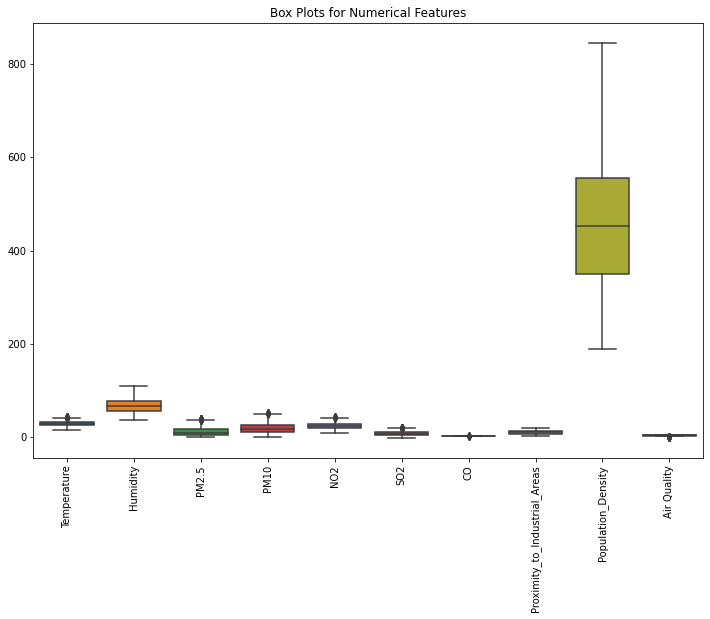

In [79]:
# Plot boxplots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plots for Numerical Features')
plt.show()

## Distribution of Cleaned Features

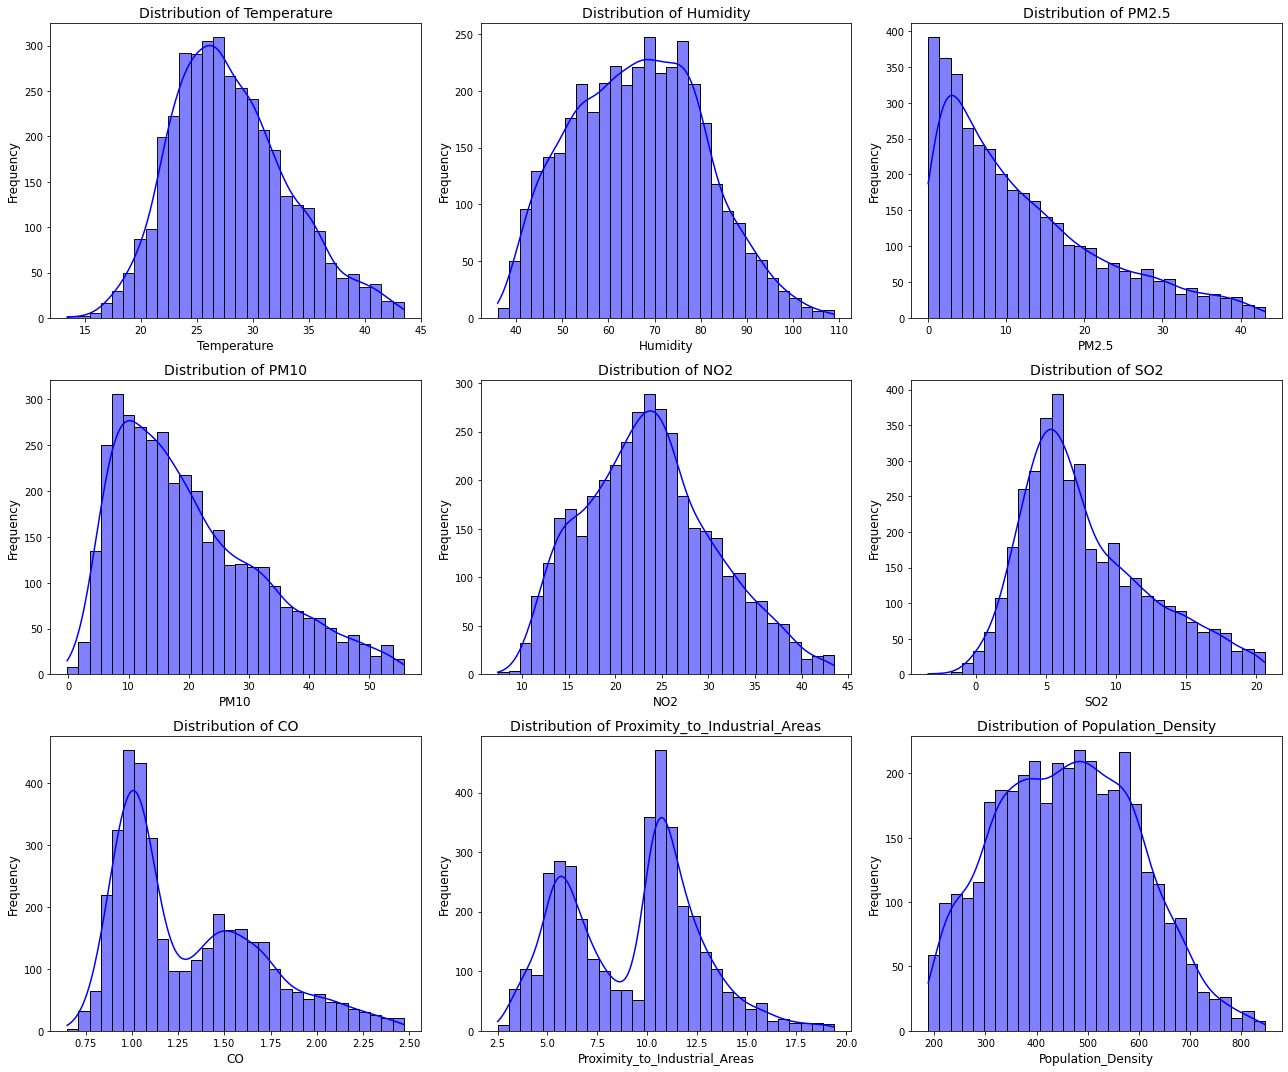

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

df_features = df.drop(columns=[df.columns[9]])

# Visualize the distribution of all features except the target
def plot_distributions(df, cols_per_row=3):
    num_cols = len(df.columns)
    num_rows = (num_cols // cols_per_row) + int(num_cols % cols_per_row > 0)

    plt.figure(figsize=(cols_per_row * 6, num_rows * 5))
    for i, column in enumerate(df.columns, 1):
        plt.subplot(num_rows, cols_per_row, i)
        sns.histplot(df[column], kde=True, bins=30, color='blue', edgecolor='black')
        plt.title(f"Distribution of {column}", fontsize=14)  # Increased title font size
        plt.xlabel(column, fontsize=12)  # Increased x-label font size
        plt.ylabel("Frequency", fontsize=12)  # Increased y-label font size
        plt.tight_layout()
    plt.show()

# Call the function to plot distributions
plot_distributions(df_features, cols_per_row=3)

## Final Cleaned Data 

In [71]:
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,3
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,3
...,...,...,...,...,...,...,...,...,...,...
3794,34.9,77.7,32.3,47.1,17.4,11.5,1.63,8.8,541,2
3795,31.1,61.0,27.1,31.1,13.0,3.8,0.98,13.4,278,3
3796,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,2
3797,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,2


In [73]:
# Count rows where Air Quality is 0
air_quality_zero_count = df[df['Air Quality'] == 0].shape[0]

print(f"Number of rows where Air Quality is 0: {air_quality_zero_count}")

Number of rows where Air Quality is 0: 37


In [75]:
# Count rows where Air Quality is 0
air_quality_zero_count = df[df['Air Quality'] == 1].shape[0]

print(f"Number of rows where Air Quality is 1: {air_quality_zero_count}")

Number of rows where Air Quality is 1: 502


In [76]:
# Count rows where Air Quality is 0
air_quality_zero_count = df[df['Air Quality'] == 2].shape[0]

print(f"Number of rows where Air Quality is 2: {air_quality_zero_count}")

Number of rows where Air Quality is 2: 1293


In [77]:
# Count rows where Air Quality is 0
air_quality_zero_count = df[df['Air Quality'] == 3].shape[0]

print(f"Number of rows where Air Quality is 3: {air_quality_zero_count}")

Number of rows where Air Quality is 3: 1967


# Correlation 

## Correlation Matrix

In [84]:
correlation_matrix = df.corr("pearson")
correlation_matrix

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
Temperature,1.000000,0.312648,0.116385,0.290387,0.406694,0.420253,0.556598,-0.509879,0.295986,-0.617964
Humidity,0.312648,1.000000,0.116814,0.248190,0.331201,0.312067,0.437054,-0.379281,0.250851,-0.495497
PM2.5,0.116385,0.116814,1.000000,0.896418,0.115766,0.127355,0.175702,-0.164776,0.086341,-0.186941
PM10,0.290387,0.248190,0.896418,1.000000,0.298695,0.312391,0.431324,-0.389290,0.225499,-0.471215
NO2,0.406694,0.331201,0.115766,0.298695,1.000000,0.428430,0.583286,-0.530301,0.324843,-0.651077
SO2,0.420253,0.312067,0.127355,0.312391,0.428430,1.000000,0.589860,-0.551922,0.324526,-0.649895
CO,0.556598,0.437054,0.175702,0.431324,0.583286,0.589860,1.000000,-0.719961,0.446323,-0.892360
Proximity_to_Industrial_Areas,-0.509879,-0.379281,-0.164776,-0.389290,-0.530301,-0.551922,-0.719961,1.000000,-0.384168,0.786728
Population_Density,0.295986,0.250851,0.086341,0.225499,0.324843,0.324526,0.446323,-0.384168,1.000000,-0.488427
Air Quality,-0.617964,-0.495497,-0.186941,-0.471215,-0.651077,-0.649895,-0.892360,0.786728,-0.488427,1.000000


## Correlation by Ranking

In [82]:
# Assuming correlation_matrix is already calculated
correlation_with_success = correlation_matrix['Air Quality']

# Sort the correlation values in descending order
correlation_ranked = correlation_with_success.sort_values(ascending=False)

# Print the ranked correlation values
print(correlation_ranked)

Air Quality                      1.000000
Proximity_to_Industrial_Areas    0.786728
PM2.5                           -0.186941
PM10                            -0.471215
Population_Density              -0.488427
Humidity                        -0.495497
Temperature                     -0.617964
SO2                             -0.649895
NO2                             -0.651077
CO                              -0.892360
Name: Air Quality, dtype: float64


## Correlation Heatmap

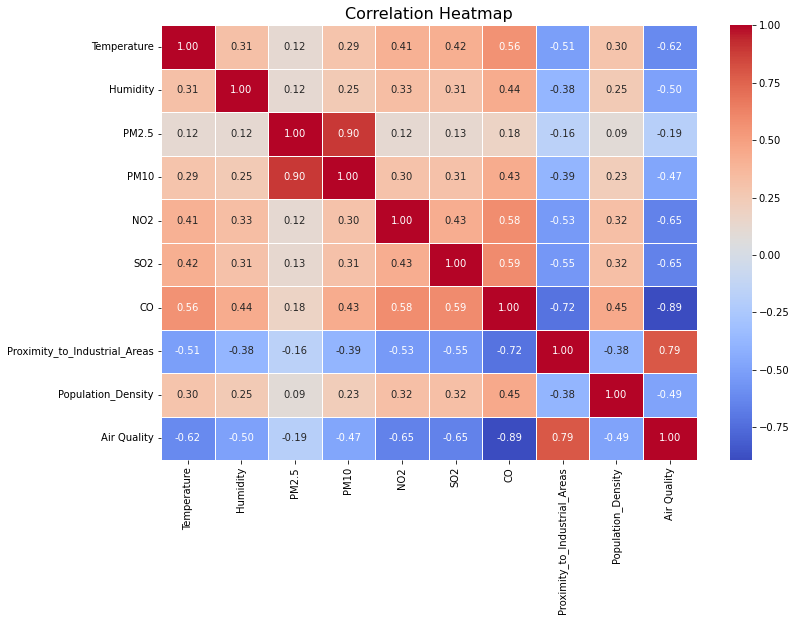

In [85]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Correlation of All Features by Class (Target Label)

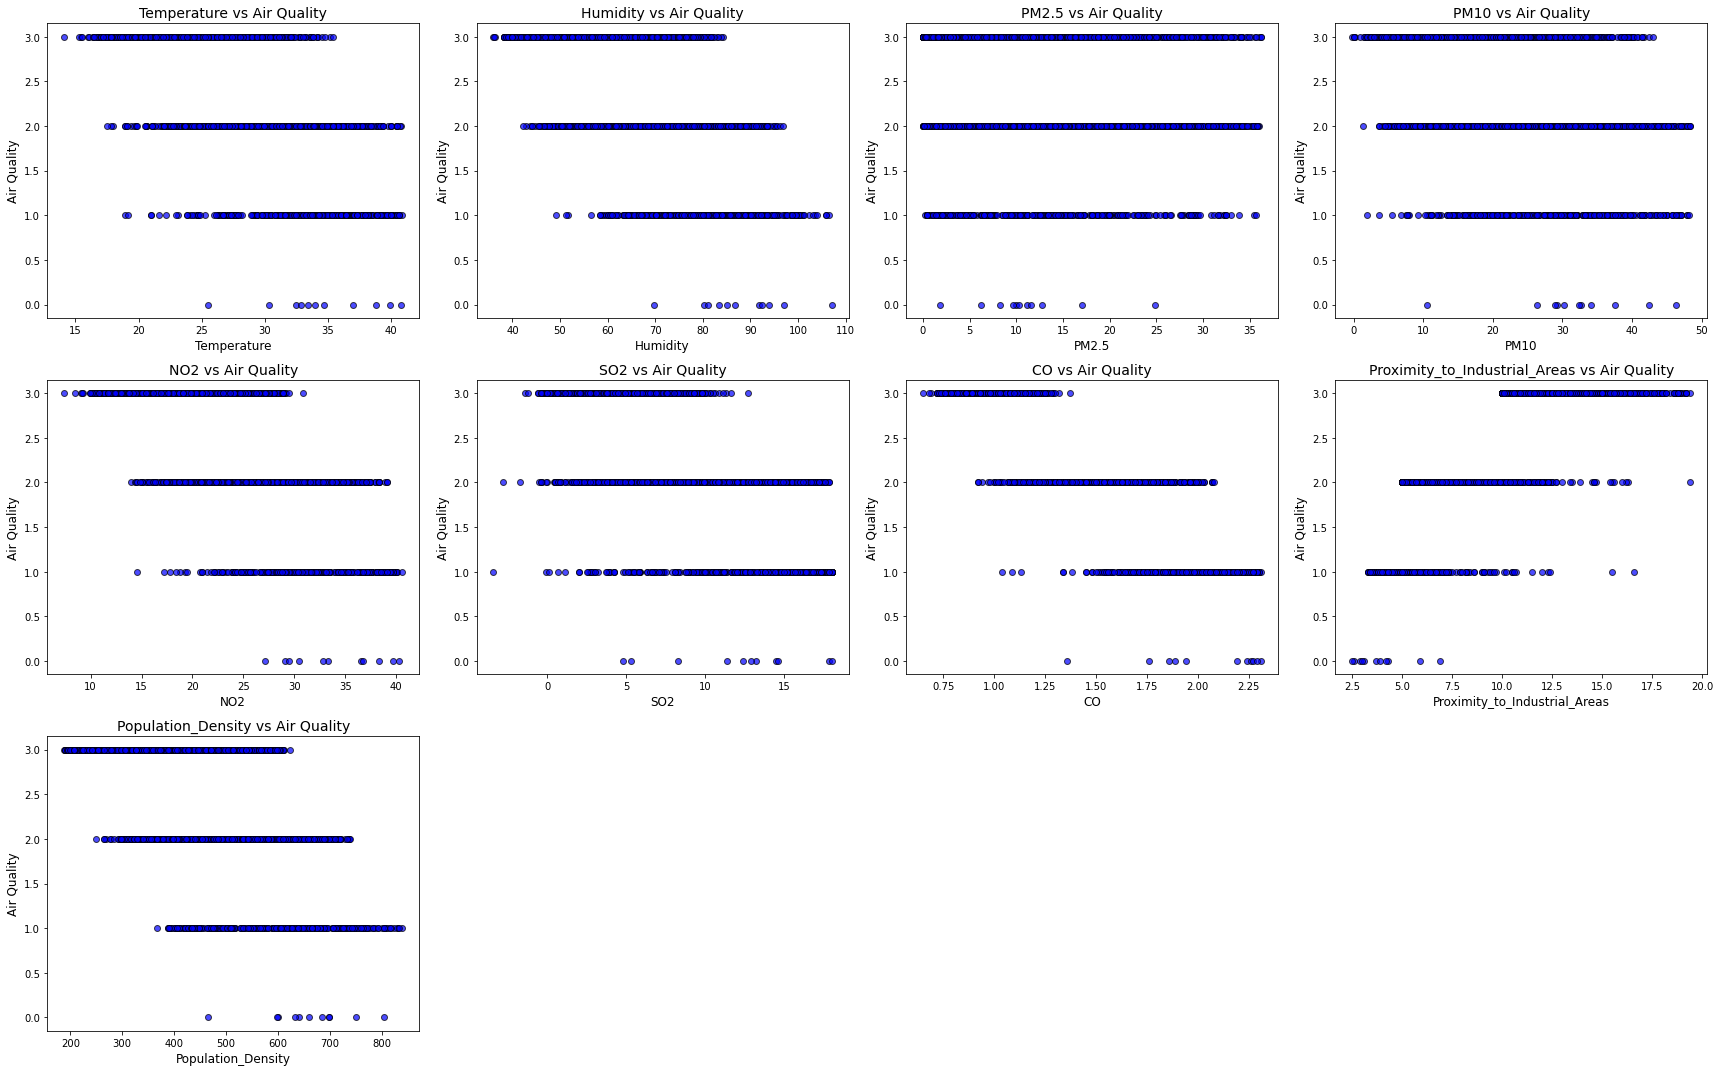

In [86]:
# Define features and target
features = df.columns[:9]
target = df.columns[9]

# Function to plot scatter plots for each feature against the target
def plot_scatter_features_vs_target(df, features, target, cols_per_row=4):
    num_features = len(features)
    num_rows = (num_features // cols_per_row) + int(num_features % cols_per_row > 0)

    plt.figure(figsize=(cols_per_row * 6, num_rows * 5))  # Adjust figure size for better readability
    for i, feature in enumerate(features, 1):
        plt.subplot(num_rows, cols_per_row, i)
        plt.scatter(df[feature], df[target], alpha=0.7, c='blue', edgecolor='k')
        plt.title(f'{feature} vs {target}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel(target, fontsize=12)
        plt.tight_layout()
    plt.show()

# Call the function to plot scatter plots
plot_scatter_features_vs_target(df, features, target, cols_per_row=4)

# Feature Importance

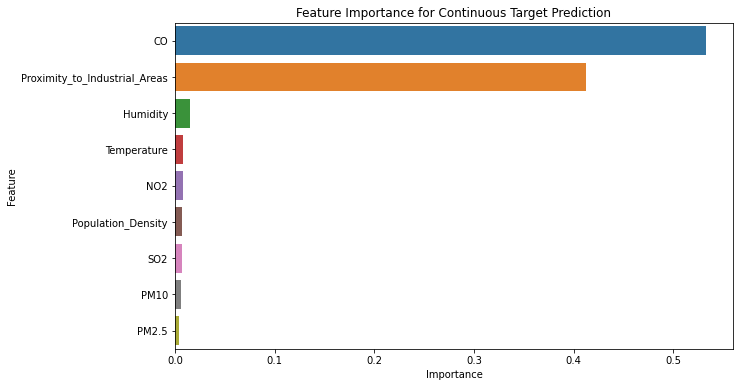

In [88]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data
X = df.drop(columns=['Air Quality'])  
y = df['Air Quality']  

# Train a Random Forest Regressor model
rf = RandomForestRegressor()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance for Continuous Target Prediction')
plt.show()

# Relationship Between Attributes

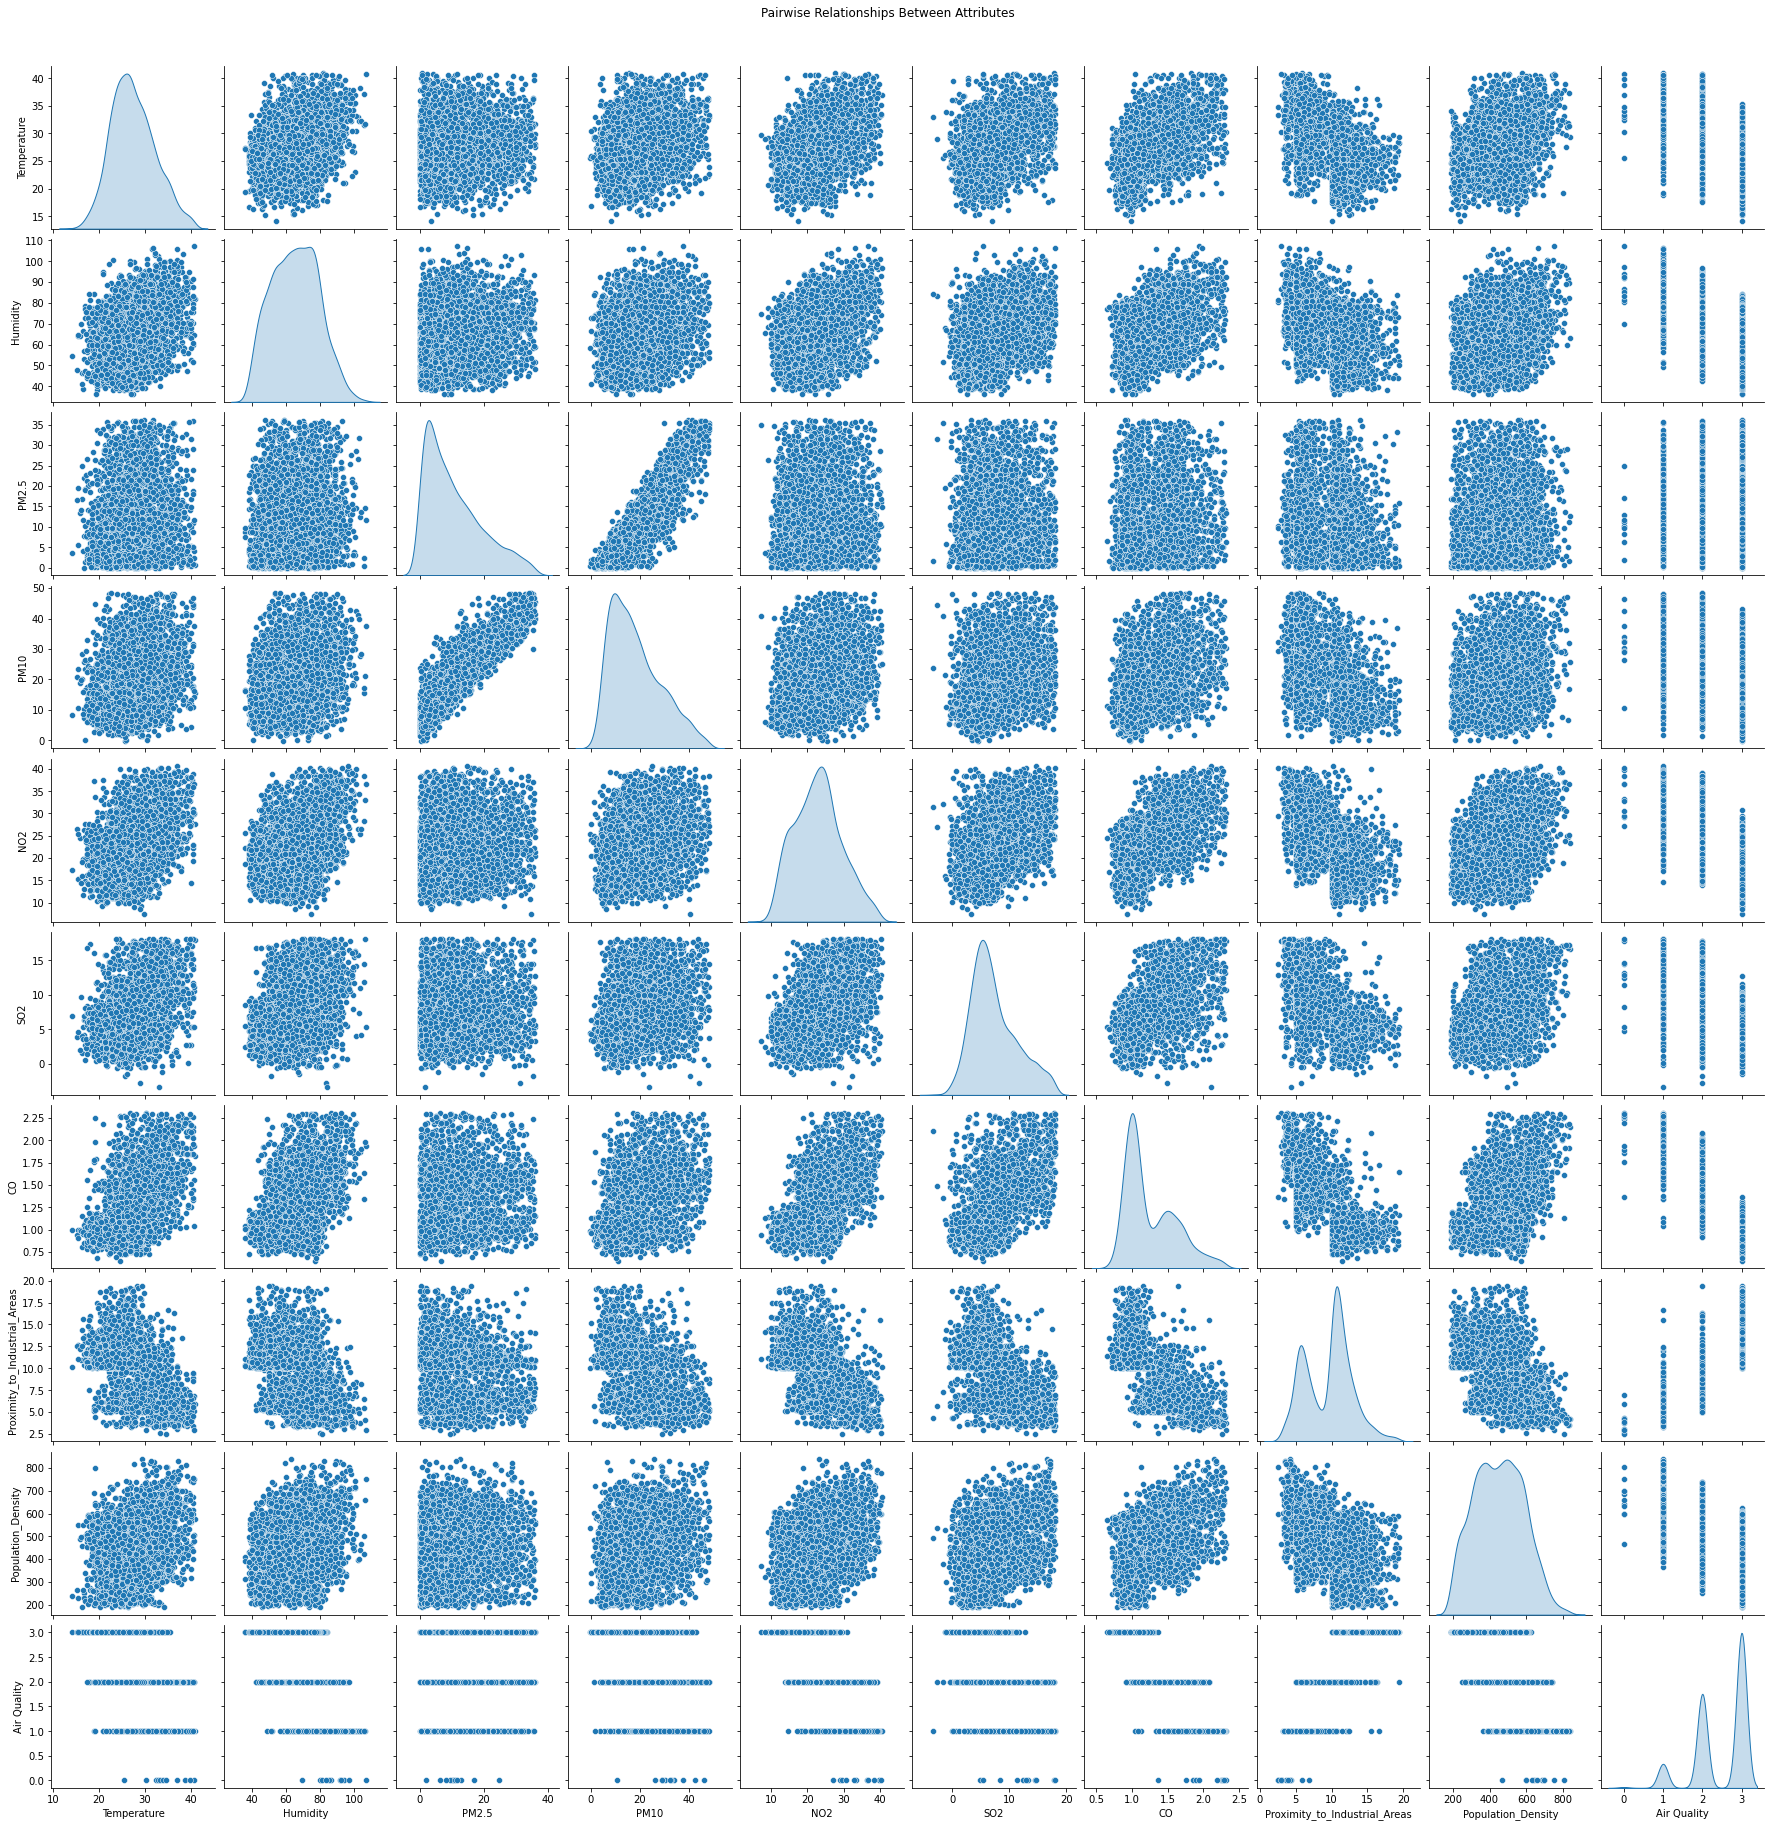

In [89]:
# Pairplot to visualize relationships
sns.pairplot(df, diag_kind="kde")
plt.suptitle("Pairwise Relationships Between Attributes", y=1.02)
plt.show()

# Data Transformation

## Min-Max Scaler

In [107]:
from sklearn.preprocessing import MinMaxScaler

# Convert DataFrame to numpy array
array = df.values

# Separate array into input (X) and output (Y) components
X = array[:, :-1]  # Input features (all rows, all columns except the last one)
Y = array[:, -1]   # Output target (all rows, only the last column)

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Rescale the input features
rescaledX = scaler.fit_transform(X)

# Print first 5 rescaled inputs
print(rescaledX[0:5, :])

[[0.5858209  0.32489451 0.14364641 0.37242798 0.34638554 0.58878505
  0.64457831 0.22485207 0.20122888]
 [0.52985075 0.55696203 0.06353591 0.25514403 0.70481928 0.61214953
  0.59638554 0.20710059 0.64976959]
 [0.3358209  0.5443038  0.73756906 0.69958848 0.51204819 0.74766355
  0.59036145 0.15976331 0.66205837]
 [0.48507463 0.04360056 0.16850829 0.13374486 0.18373494 0.40654206
  0.30120482 0.50887574 0.55760369]
 [0.46268657 0.48804501 0.19060773 0.33333333 0.43674699 0.42056075
  0.21686747 0.6035503  0.17665131]]


In [110]:
# Verify total rows and columns are matched

# Print the dimensions of rescaledX
print("Total Rows in rescaledX:", rescaledX.shape[0])
print("Total Columns in rescaledX:", rescaledX.shape[1])

# Compare with the first 10 columns of df
df_subset = df.iloc[:, :10]  # Select the first 10 columns
print("Total Rows in df (first 10 columns):", df_subset.shape[0])
print("Total Columns in df (first 10 columns):", df_subset.shape[1])

# Check if the totals match
if rescaledX.shape == df_subset.shape:
    print("\nThe total rows and columns match!")
else:
    print("\nThe totals do not match.")

# Show rescaledX for further inspection (optional)
print("\nRescaled Input Features (first 5 rows):")
rescaledX

Total Rows in rescaledX: 3439
Total Columns in rescaledX: 9
Total Rows in df (first 10 columns): 3439
Total Columns in df (first 10 columns): 10

The totals do not match.

Rescaled Input Features (first 5 rows):


array([[0.5858209 , 0.32489451, 0.14364641, ..., 0.64457831, 0.22485207,
        0.20122888],
       [0.52985075, 0.55696203, 0.06353591, ..., 0.59638554, 0.20710059,
        0.64976959],
       [0.3358209 , 0.5443038 , 0.73756906, ..., 0.59036145, 0.15976331,
        0.66205837],
       ...,
       [0.52238806, 0.85654008, 0.19060773, ..., 0.53614458, 0.18934911,
        0.80030722],
       [0.44029851, 0.59353024, 0.39226519, ..., 0.59036145, 0.42011834,
        0.29339478],
       [0.41791045, 0.11814346, 0.59116022, ..., 0.14457831, 0.53846154,
        0.08141321]])

In [112]:
len(Y)
Y

array([2., 2., 2., ..., 2., 2., 3.])

In [106]:
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,3
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,3
...,...,...,...,...,...,...,...,...,...,...
3434,34.9,77.7,32.3,47.1,17.4,11.5,1.63,8.8,541,2
3435,31.1,61.0,27.1,31.1,13.0,3.8,0.98,13.4,278,3
3436,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,2
3437,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,2


# Splitting to Train and Test Data

In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split

array = df.values

# Extract X (features) and y (target)
X = rescaledX
#X = array[:, :-1]
y = Y

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Checking for Total Training and Test Data After Splitting

In [139]:
print("Total training data of X:", len(X_train))
print("Total test data of X:", len(X_test))
print()
print("Total training data of Y:", len(y_train))
print("Total test data of Y:", len(y_test))

Total training data of X: 2407
Total test data of X: 1032

Total training data of Y: 2407
Total test data of Y: 1032


# Checking for Data Imbalance

In [140]:
class_dist = df.groupby('Air Quality').size()
print(class_dist)
print()
print("Class 0")
print("Class 1")
print("Class 2")
print("Class 3")
print()
total_samples = class_dist.sum()
percentages = (class_dist / total_samples) * 100
print(percentages)

# Calculate the percentage difference
percentage_diff = abs(percentages[0] - percentages[1]) / total_samples * 100
print()
# Check if the dataset is balanced or not
if percentage_diff < 20:
    print("The dataset is balanced with a percentage difference of {:.2f}%".format(percentage_diff))
else:
    print("The dataset is not balanced with a percentage difference of {:.2f}%".format(percentage_diff))

Air Quality
0      11
1     302
2    1180
3    1946
dtype: int64

Class 0
Class 1
Class 2
Class 3

Air Quality
0     0.319860
1     8.781623
2    34.312300
3    56.586217
dtype: float64

The dataset is balanced with a percentage difference of 0.25%


##  Checking for Data Imbalance in Training Data

In [141]:
# Convert y_train to pandas Series if it is a NumPy array
y_train_series = pd.Series(y_train)

# Calculate the class distribution in the training data
class_dist_train = y_train_series.value_counts()
print("Class distribution in training data:")
print(class_dist_train)
print()

# Calculate the percentage for each class in the training data
total_samples_train = class_dist_train.sum()
percentages_train = (class_dist_train / total_samples_train) * 100
print("Class Percentages in Training Data:")
print(percentages_train)

Class distribution in training data:
3.0    1355
2.0     822
1.0     222
0.0       8
dtype: int64

Class Percentages in Training Data:
3.0    56.294142
2.0    34.150395
1.0     9.223099
0.0     0.332364
dtype: float64


# SMOTE Oversampling for Minority Class

In [142]:
from imblearn.over_sampling import SMOTE

# Convert y_train to a pandas Series for easier manipulation
y_train = pd.Series(y_train)

print('Before Oversampling:')
print(y_train.value_counts())

# Apply SMOTE for oversampling only on the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Convert y_train_smote back to a pandas Series to use value_counts()
y_train_smote = pd.Series(y_train_smote)

print('After Oversampling:')
print(y_train_smote.value_counts())

Before Oversampling:
3.0    1355
2.0     822
1.0     222
0.0       8
dtype: int64
After Oversampling:
2.0    1355
1.0    1355
3.0    1355
0.0    1355
dtype: int64


# Train, Test and Evaluate Models



Logistic Regression: Accuracy: 0.880

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.07      0.67      0.13         3
         1.0       0.40      0.56      0.47        80
         2.0       0.95      0.75      0.84       358
         3.0       0.97      1.00      0.98       591

    accuracy                           0.88      1032
   macro avg       0.60      0.75      0.61      1032
weighted avg       0.92      0.88      0.89      1032




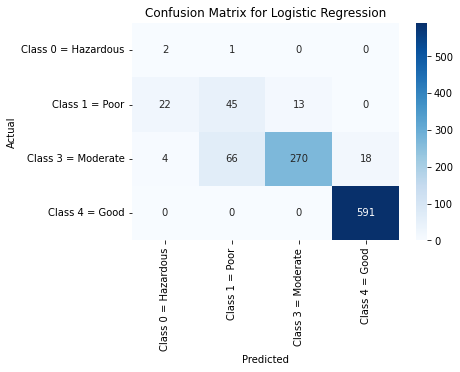



KNN: Accuracy: 0.955

Classification Report for KNN:
               precision    recall  f1-score   support

         0.0       0.10      0.33      0.15         3
         1.0       0.73      0.79      0.76        80
         2.0       0.98      0.92      0.95       358
         3.0       0.99      1.00      0.99       591

    accuracy                           0.96      1032
   macro avg       0.70      0.76      0.71      1032
weighted avg       0.96      0.96      0.96      1032




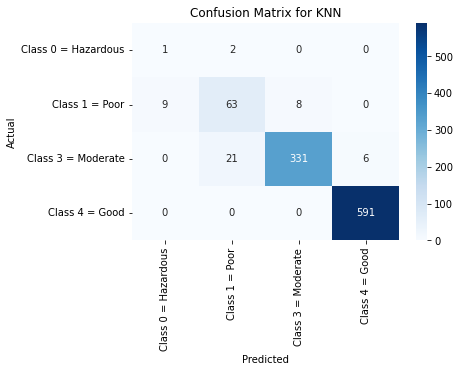



Decision Tree: Accuracy: 0.956

Classification Report for Decision Tree:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.75      0.79      0.77        80
         2.0       0.95      0.94      0.94       358
         3.0       1.00      0.99      1.00       591

    accuracy                           0.96      1032
   macro avg       0.67      0.68      0.68      1032
weighted avg       0.96      0.96      0.96      1032




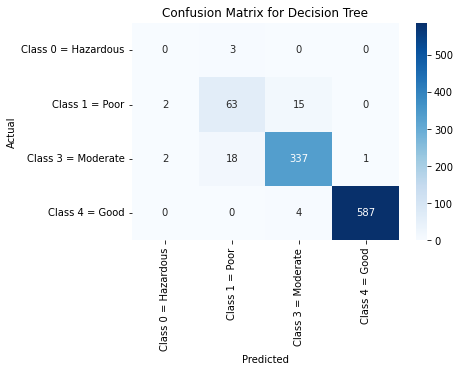



Naive Bayes: Accuracy: 0.964

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.74      0.84      0.79        80
         2.0       0.98      0.94      0.96       358
         3.0       1.00      1.00      1.00       591

    accuracy                           0.96      1032
   macro avg       0.68      0.69      0.69      1032
weighted avg       0.97      0.96      0.97      1032




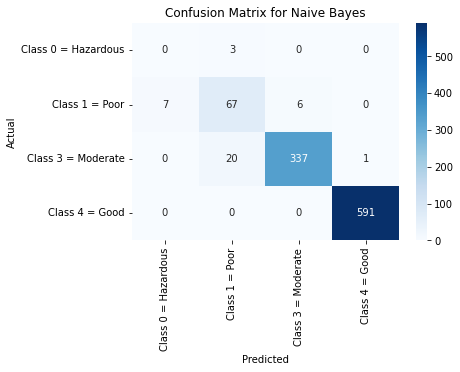



Support Vector Machine: Accuracy: 0.977

Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

         0.0       0.17      0.33      0.22         3
         1.0       0.85      0.89      0.87        80
         2.0       0.99      0.97      0.98       358
         3.0       1.00      1.00      1.00       591

    accuracy                           0.98      1032
   macro avg       0.75      0.80      0.77      1032
weighted avg       0.98      0.98      0.98      1032




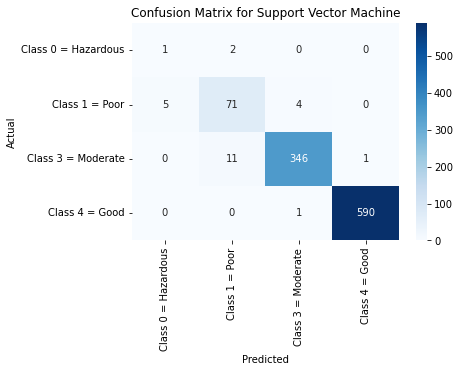



GBM: Accuracy: 0.989

Classification Report for GBM:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.92      0.96      0.94        80
         2.0       0.99      0.99      0.99       358
         3.0       1.00      1.00      1.00       591

    accuracy                           0.99      1032
   macro avg       0.73      0.74      0.73      1032
weighted avg       0.99      0.99      0.99      1032




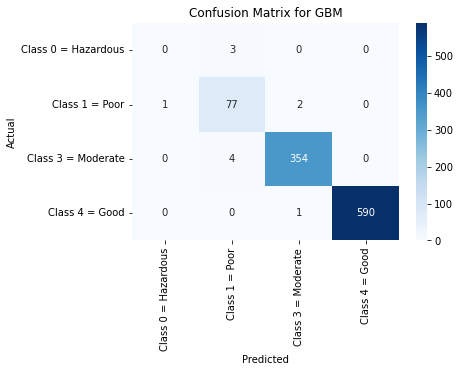



XGBoost: Accuracy: 0.984

Classification Report for XGBoost:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.89      0.93      0.91        80
         2.0       0.99      0.98      0.98       358
         3.0       1.00      1.00      1.00       591

    accuracy                           0.98      1032
   macro avg       0.72      0.73      0.72      1032
weighted avg       0.98      0.98      0.98      1032




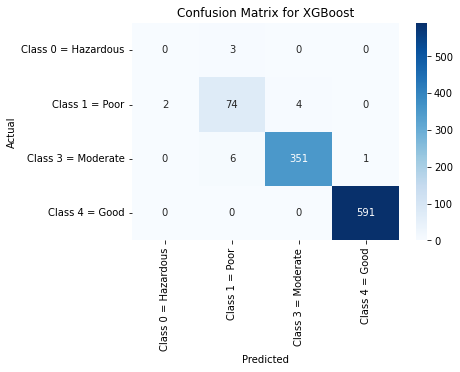



MLP: Accuracy: 0.973

Classification Report for MLP:
               precision    recall  f1-score   support

         0.0       0.25      0.33      0.29         3
         1.0       0.78      0.94      0.85        80
         2.0       0.99      0.94      0.97       358
         3.0       1.00      1.00      1.00       591

    accuracy                           0.97      1032
   macro avg       0.76      0.80      0.78      1032
weighted avg       0.98      0.97      0.97      1032




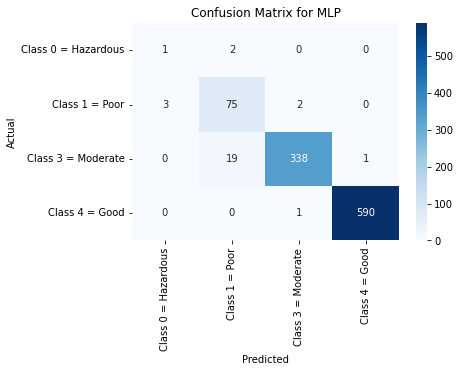



Algorithm Comparison:



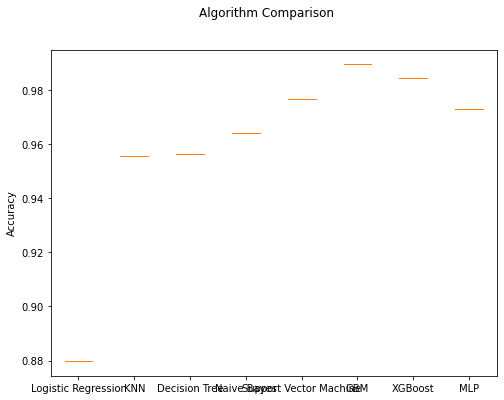

In [149]:
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Prepare models
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Support Vector Machine', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('XGBoost', xgb.XGBClassifier(eval_metric='mlogloss')))
models.append(('MLP', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    # Train the model
    model.fit(X_train_smote, y_train_smote)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = model.score(X_test, y_test)
    results.append([accuracy])
    names.append(name)
    print()
    print(f"{name}: Accuracy: {accuracy:.3f}")
    print()

    # Classification report
    print(f"Classification Report for {name}:\n", classification_report(y_test, y_pred))
    print()

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Class 0 = Hazardous', 'Class 1 = Poor','Class 3 = Moderate', 'Class 4 = Good'], yticklabels=['Class 0 = Hazardous', 'Class 1 = Poor','Class 3 = Moderate', 'Class 4 = Good'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print()

# Boxplot for algorithm comparison
print()
print("Algorithm Comparison:")
print()
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.show()

# Prediction Table Output

In [150]:
# Dictionary to store predictions for each model
test_predictions = {}

# Loop through each model to train and make predictions
for name, model in models:
    # Train the model
    model.fit(X_train_smote, y_train_smote)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Store predictions in the dictionary
    test_predictions[name] = y_pred

# Convert the predictions dictionary into a DataFrame
predictions_df = pd.DataFrame(test_predictions)

# Add the actual values for comparison
predictions_df['Actual Value'] = y_test

# Reorder the columns to put the 'Actual Value' in the first column
predictions_df = predictions_df[['Actual Value'] + [col for col in predictions_df.columns if col != 'Actual Value']]

# Display the predictions DataFrame
print("Table of Predictions:")
predictions_df

Table of Predictions:


,Actual Value,Logistic Regression,KNN,Decision Tree,Naive Bayes,Support Vector Machine,GBM,XGBoost,MLP
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0
2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0
4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0
...,...,...,...,...,...,...,...,...,...
1027,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0
1028,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2,1.0
1029,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0
1030,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0
